In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: set seaborn style for better visuals
sns.set(style="whitegrid")

In [2]:
df = pd.read_excel("im_conda1.xlsx", engine="openpyxl")
df.head(5)

,key,SUBJECT_ID,EID,GROUP,TYPE,YEAR,FAC,SEX,RACE,AGE,...,ASA,HW,HWC,LSMC,Pneumothorax?,Pleural Effusion?,Neuro Injury?,Arrhythmia?,POH,STRING
0,15841832,1,15841832,CEA,5-Epi (w/Opioid),2,SPOKANE,Female,White,14.056298,...,1,43,E,NaN,NaN,NaN,NaN,NaN,0,QBK
1,15841832,1,15841832,CEA,5-Epi (w/Opioid),2,SPOKANE,Female,White,14.056298,...,1,43,E,NaN,NaN,NaN,NaN,NaN,1,QBDE
2,15841832,1,15841832,CEA,5-Epi (w/Opioid),2,SPOKANE,Female,White,14.056298,...,1,43,E,NaN,NaN,NaN,NaN,NaN,2,QBD
3,15841832,1,15841832,CEA,5-Epi (w/Opioid),2,SPOKANE,Female,White,14.056298,...,1,43,E,NaN,NaN,NaN,NaN,NaN,3,QBD
4,15841832,1,15841832,CEA,5-Epi (w/Opioid),2,SPOKANE,Female,White,14.056298,...,1,43,E,NaN,NaN,NaN,NaN,NaN,4,QBDH


In [3]:
demog = pd.read_excel("demog_conda1.xlsx", engine="openpyxl")
demog.head(5)

,KEY,SUBJECT,DISCARD FIXEd,EID,FIN,GROUP,TYPE,YEAR,FAC,SEX,...,ASA,PROC,PIR,START,STOP,POR,DUR,HW,HWC,PCA?
0,15841832,1,x,15841832,5932582,CEA,5-Epi (w/Opioid),2,SPOKANE,Female,...,1,Fusion Spine Instrumentation,2012-01-17 10:55:00,2012-01-17 11:36:00,2012-01-17 15:05:00,2012-01-17 15:21:00,209,43.0,E,False
1,16212574,11,x,16212574,6050119,OBA,2-Morphine-PCA,1,LEXINGTON,Male,...,2,Fusion Spine Instrumentation,2011-02-03 04:42:00,2011-02-03 06:07:00,2011-02-03 11:48:00,2011-02-03 12:27:00,341,23.0,C,True
2,16256322,17,x,16256322,6064105,OBA,3-Hydromorphone-PCA,1,LEXINGTON,Female,...,2,Fusion Spine Instrumentation,2011-03-10 04:40:00,2011-03-10 05:59:00,2011-03-10 12:23:00,2011-03-10 12:49:00,384,15.0,B,True
3,16318565,25,x,16318565,6084054,OBA,3-Hydromorphone-PCA,1,PORTLAND,Female,...,2,Fusion Spine Instrumentation,2011-03-07 07:28:00,2011-03-07 08:25:00,2011-03-07 12:52:00,2011-03-07 13:15:00,267,18.0,B,True
4,16332561,30,x,16332561,6087383,OBA,2-Morphine-PCA,1,LEXINGTON,Female,...,1,Fusion Spine Instrumentation,2011-03-08 05:13:00,2011-03-08 06:33:00,2011-03-08 10:42:00,2011-03-08 11:12:00,249,15.0,B,True


In [4]:
type_restore_map = {
    '2-Morphine-PCA': '1-Morphine-PCA',
    '3-Hydromorphone-PCA': '2-Hydromorphone-PCA',
    '5-Epi (w/Opioid)': '3-Epi (w/Opioid)',
    '6-Block w/Opioid': '4-Block w/Opioid'
}


demog['TYPE'] = demog['TYPE'].replace(type_restore_map)


In [5]:

df['TYPE'] = df['TYPE'].replace(type_restore_map)


In [6]:
# Identify object columns
object_cols = df.select_dtypes(include='object').columns

# Convert each to category
df[object_cols] = df[object_cols].astype('category')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208648 entries, 0 to 208647
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   key                208648 non-null  int64   
 1   SUBJECT_ID         208648 non-null  int64   
 2   EID                208648 non-null  int64   
 3   GROUP              208648 non-null  category
 4   TYPE               208648 non-null  category
 5   YEAR               208648 non-null  int64   
 6   FAC                208648 non-null  category
 7   SEX                208648 non-null  category
 8   RACE               208648 non-null  category
 9   AGE                208648 non-null  float64 
 10  BMI                208648 non-null  float64 
 11  DSC_POH            208648 non-null  float64 
 12  ASA                208648 non-null  int64   
 13  HW                 208648 non-null  int64   
 14  HWC                208648 non-null  category
 15  LSMC               7920 non-null  

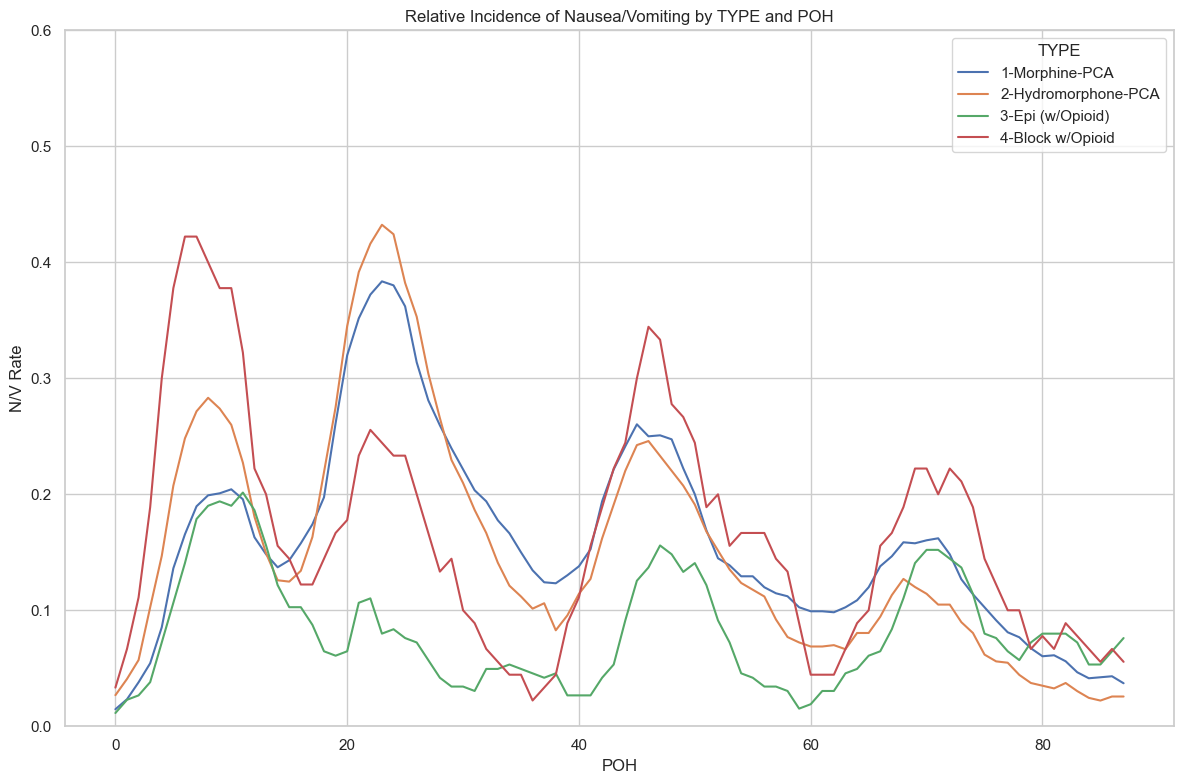

In [17]:
df['NV'] = df['STRING'].str.contains('H')
df['Constipation'] = df['STRING'].str.contains('I')
df['Pruritis'] = df['STRING'].str.contains('J')
df['POAE'] = df['STRING'].str.contains('K')

import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate proportion of Spasm by POH and TYPE
prop_df = (
    df.groupby(['POH', 'TYPE'])['NV']
    .mean()
    .reset_index()
    .rename(columns={'NV': 'N/V Rate'})
)

# Plot
plt.figure(figsize=(12,8))
sns.lineplot(data=prop_df, x='POH', y='N/V Rate',color=sns.color_palette('bright'), hue='TYPE') #, marker='o')
plt.title("Relative Incidence of Nausea/Vomiting by TYPE and POH")
plt.ylabel("N/V Rate")
plt.xlabel("POH")
plt.ylim(0, .6)
plt.grid(True)
plt.tight_layout()
plt.show()


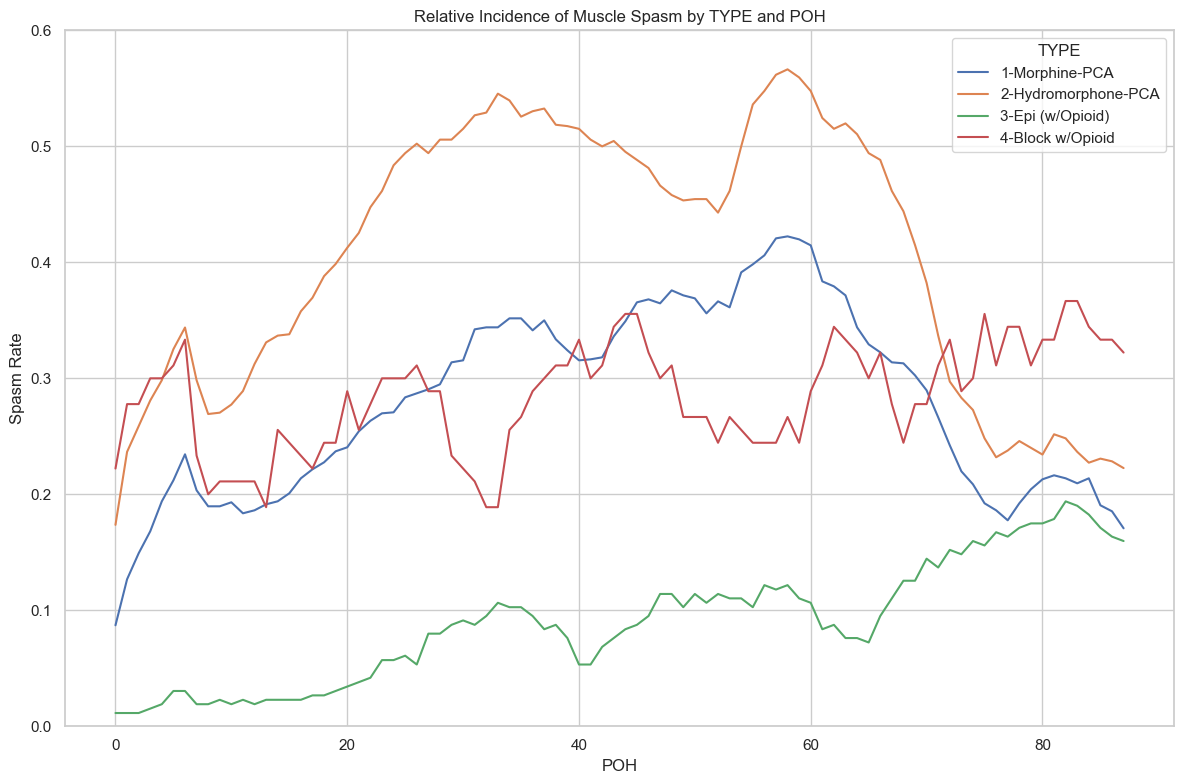

In [18]:
df['Spasm'] = df['STRING'].str.contains('G')
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate proportion of Spasm by POH and TYPE
prop_df1 = (
    df.groupby(['POH', 'TYPE'])['Spasm']
    .mean()
    .reset_index()
    .rename(columns={'Spasm': 'Spasm Rate'})
)

# Plot
plt.figure(figsize=(12,8))
sns.lineplot(data=prop_df1, x='POH', y='Spasm Rate',color=sns.color_palette('bright'), hue='TYPE') #, marker='o')
plt.title("Relative Incidence of Muscle Spasm by TYPE and POH")
plt.ylabel("Spasm Rate")
plt.xlabel("POH")
plt.ylim(0, .6)
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
prop_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
POH,352.0,NaN,NaN,NaN,43.5,25.437931,0.0,21.75,43.5,65.25,87.0
TYPE,352,4,1-Morphine-PCA,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N/V Rate,352.0,222.0,0.166667,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
prop_df.head(10)

,POH,TYPE,N/V Rate
0,0,1-Morphine-PCA,0.014655
1,0,2-Hydromorphone-PCA,0.026807
2,0,3-Epi (w/Opioid),0.011407
3,0,4-Block w/Opioid,0.033333
4,1,1-Morphine-PCA,0.023276
5,1,2-Hydromorphone-PCA,0.040793
6,1,3-Epi (w/Opioid),0.022814
7,1,4-Block w/Opioid,0.066667
8,2,1-Morphine-PCA,0.037931
9,2,2-Hydromorphone-PCA,0.05711


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208648 entries, 0 to 208647
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   key                208648 non-null  int64   
 1   SUBJECT_ID         208648 non-null  int64   
 2   EID                208648 non-null  int64   
 3   GROUP              208648 non-null  category
 4   TYPE               208648 non-null  category
 5   YEAR               208648 non-null  int64   
 6   FAC                208648 non-null  category
 7   SEX                208648 non-null  category
 8   RACE               208648 non-null  category
 9   AGE                208648 non-null  float64 
 10  BMI                208648 non-null  float64 
 11  DSC_POH            208648 non-null  float64 
 12  ASA                208648 non-null  int64   
 13  HW                 208648 non-null  int64   
 14  HWC                208648 non-null  category
 15  LSMC               7920 non-null  

In [22]:
for col in ['Spasm', 'NV', 'Constipation', 'Pruritis', 'POAE']:
    df[col] = df[col].astype('bool')


In [23]:
print(df[['Spasm', 'NV', 'Constipation', 'Pruritis', 'POAE']].dtypes)


Spasm           bool
NV              bool
Constipation    bool
Pruritis        bool
POAE            bool
dtype: object


In [24]:
def bin_poh(poh):
    if 0 <= poh <= 15:
        return "POD-0"
    elif 16 <= poh <= 39:
        return "POD-1"
    elif 40 <= poh <= 63:
        return "POD-2"
    elif 64 <= poh <= 87:
        return "POD-3"
    else:
        return None

df['POD'] = df['POH'].apply(bin_poh)
df = df.dropna(subset=['POD'])

In [25]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Ensure complication columns are boolean
for col in ['Spasm', 'NV', 'Constipation', 'Pruritis', 'POAE']:
    df[col] = df[col].astype(bool)

# Define labels for display
symptoms = {
    'Spasm': 'Muscle Spasm',
    'NV': 'Nausea/Vomiting',
    'Constipation': 'Constipation',
    'Pruritis': 'Pruritis',
    'POAE': 'POAE'
}

results = []

for pod in ['POD-0', 'POD-1', 'POD-2', 'POD-3']:
    pod_df = df[df['POD'] == pod]
    morph_df = pod_df[pod_df['TYPE'] == '1-Morphine-PCA']

    for sym_col, label in symptoms.items():
        morph_flag = morph_df[sym_col]
        morph_n = morph_flag.notna().sum()

        for t in pod_df['TYPE'].unique():
            if t == '1-Morphine-PCA':
                continue

            comp_flag = pod_df[pod_df['TYPE'] == t][sym_col]
            comp_n = comp_flag.notna().sum()

            #print(f"{pod} | {label} | Morphine N={morph_n}, {t} N={comp_n}")

            if morph_n >= 3 and comp_n >= 3:
                morph_vals = morph_flag.astype(int)
                comp_vals = comp_flag.astype(int)

                stat, p = mannwhitneyu(morph_vals, comp_vals, alternative='two-sided')
                morph_rate = morph_vals.mean()
                comp_rate = comp_vals.mean()
                pct_diff = ((comp_rate - morph_rate))*100  if morph_rate != 0 else None

                if p >= 0.05:
                    interpretation = "Not significant"
                elif abs(pct_diff) >= 20:
                    interpretation = "Significant"
                elif abs(pct_diff) >= 10:
                    interpretation = "Possibly significant"
                else:
                    interpretation = "Marginal"

                results.append({
                    "POD": pod,
                    "Symptom": label,
                    "Compared TYPE": t,
                    "Morphine Rate": round(morph_rate * 100, 2),
                    "Compared Rate": round(comp_rate * 100, 2),
                    "% Difference": round(pct_diff, 2),
                    "p-value": round(p, 4),
                    "Interpretation": interpretation
                })

# Create styled table
summary_df = pd.DataFrame(results)

if not summary_df.empty:
    display(
        summary_df.style.set_caption(
            "<strong>Complication Incidence vs Morphine-PCA by POD</strong><br><br>"
            "• Mann–Whitney U test on binary symptom presence<br>"
            "• ≥ 20% difference → Significant<br>"
            "• 10–19.99% difference → Possibly significant<br>"
            "• p ≥ 0.05 → Not significant"
        )
        .format({
            "Morphine Rate": "{:.2f}%",
            "Compared Rate": "{:.2f}%",
            "% Difference": "{:+.2f}%",
            "p-value": "{:.4f}"
        })
        .highlight_min(subset=["p-value"], color="lightgreen")
        .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])
    )
else:
    print("No valid comparisons found — check sample sizes or symptom flags.")


,POD,Symptom,Compared TYPE,Morphine Rate,Compared Rate,% Difference,p-value,Interpretation
0,POD-0,Muscle Spasm,3-Epi (w/Opioid),18.15%,2.00%,-16.15%,0.0000,Possibly significant
1,POD-0,Muscle Spasm,2-Hydromorphone-PCA,18.15%,29.00%,+10.85%,0.0000,Possibly significant
2,POD-0,Muscle Spasm,4-Block w/Opioid,18.15%,24.93%,+6.78%,0.0000,Marginal
3,POD-0,Nausea/Vomiting,3-Epi (w/Opioid),13.11%,12.12%,-0.99%,0.0826,Not significant
4,POD-0,Nausea/Vomiting,2-Hydromorphone-PCA,13.11%,17.04%,+3.92%,0.0000,Marginal
5,POD-0,Nausea/Vomiting,4-Block w/Opioid,13.11%,25.76%,+12.65%,0.0000,Possibly significant
6,POD-0,Constipation,3-Epi (w/Opioid),0.05%,0.00%,-0.05%,0.1321,Not significant
7,POD-0,Constipation,2-Hydromorphone-PCA,0.05%,0.05%,-0.00%,0.9109,Not significant
8,POD-0,Constipation,4-Block w/Opioid,0.05%,0.00%,-0.05%,0.3783,Not significant
9,POD-0,Pruritis,3-Epi (w/Opioid),7.06%,7.70%,+0.64%,0.1455,Not significant


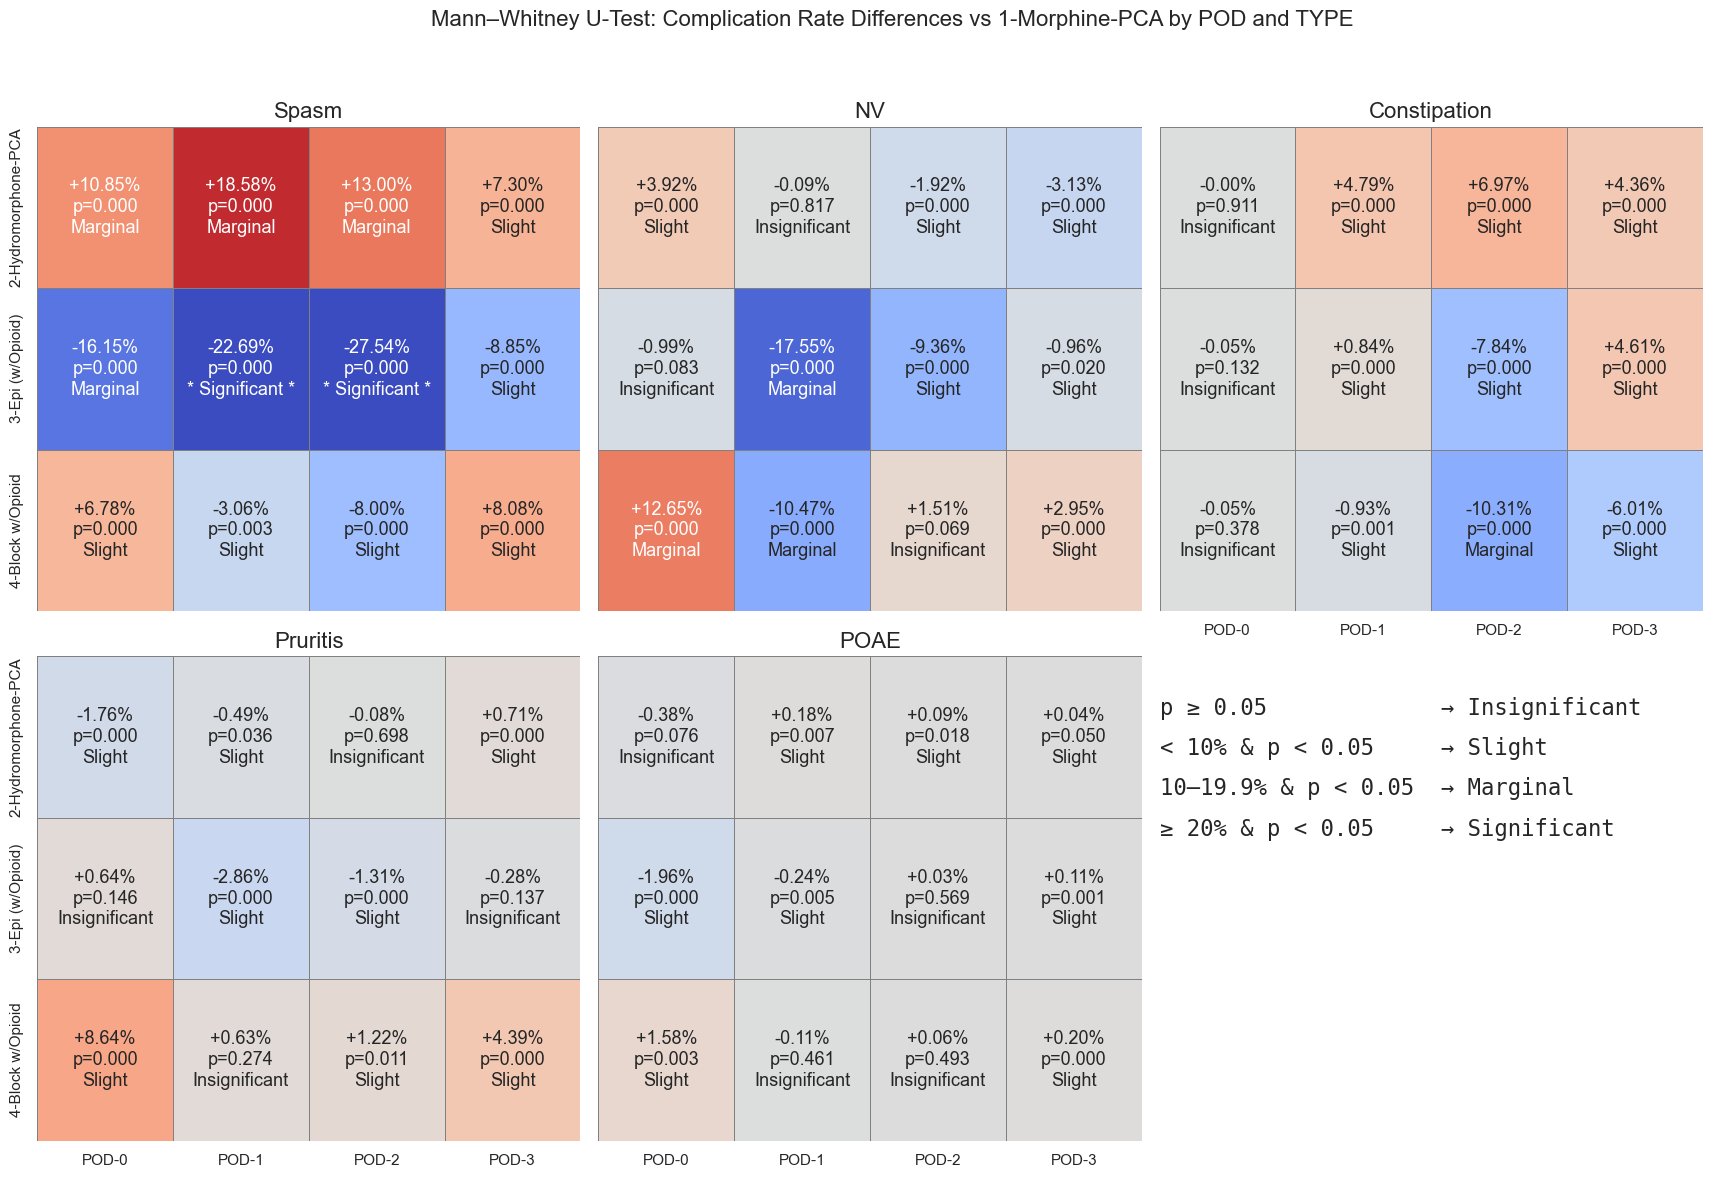

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Ensure complication columns are boolean
complication_cols = ['Spasm', 'NV', 'Constipation', 'Pruritis', 'POAE']
for col in complication_cols:
    df[col] = df[col].astype(bool)

benchmark_type = '1-Morphine-PCA'
pods = ['POD-0', 'POD-1', 'POD-2', 'POD-3']
types = sorted(df['TYPE'].unique())
comparison_types = [t for t in types if t != benchmark_type]

# Prepare data structure
heatmap_matrices = {}
annotation_matrices = {}

for symptom in complication_cols:
    rate_diff_matrix = pd.DataFrame(index=comparison_types, columns=pods)
    annotation_matrix = pd.DataFrame(index=comparison_types, columns=pods)

    for pod in pods:
        pod_df = df[df['POD'] == pod]
        morph_df = pod_df[pod_df['TYPE'] == benchmark_type]
        morph_vals = morph_df[symptom].astype(int)
        morph_n = morph_vals.notna().sum()
        morph_rate = morph_vals.mean()

        for t in comparison_types:
            comp_df = pod_df[pod_df['TYPE'] == t]
            comp_vals = comp_df[symptom].astype(int)
            comp_n = comp_vals.notna().sum()
            comp_rate = comp_vals.mean()

            if morph_n >= 3 and comp_n >= 3:
                stat, p = mannwhitneyu(morph_vals, comp_vals, alternative='two-sided')
                rate_diff = (comp_rate - morph_rate) * 100
                rate_diff_matrix.loc[t, pod] = rate_diff

                # Apply rubric
                abs_diff = abs(rate_diff)
                if p >= 0.05:
                    interpretation = "Insignificant"
                elif abs_diff >= 20:
                    interpretation = "* Significant *"
                elif abs_diff >= 10:
                    interpretation = "Marginal"
                else:
                    interpretation = "Slight"

                # Format annotation
                diff_str = f"{rate_diff:+.2f}%"
                p_str = f"p={p:.3f}"
                if p < 0.05:
                    annotation = f"{diff_str}\n{p_str}\n{interpretation}"
                else:
                    annotation = f"{diff_str}\n{p_str}\n{interpretation}"
                annotation_matrix.loc[t, pod] = annotation
            else:
                rate_diff_matrix.loc[t, pod] = None
                annotation_matrix.loc[t, pod] = "n<3"

    heatmap_matrices[symptom] = rate_diff_matrix.astype(float)
    annotation_matrices[symptom] = annotation_matrix

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18,12), sharex=True, sharey=True)
axes = axes.flatten()

for i, symptom in enumerate(complication_cols):
    sns.heatmap(
        heatmap_matrices[symptom],
        ax=axes[i],
        annot=annotation_matrices[symptom],
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-20,
        vmax=20,
        cbar=False,
        linewidths=0.5,
        linecolor='gray',
        annot_kws={"fontsize": 13}
    )
    axes[i].set_title(symptom, fontsize=16)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide unused subplot
# Add rubric table to bottom-right subplot (axes[5])
axes[5].axis('off')
axes[5].set_title("", fontsize=16, pad=10)

rubric_rows = [
    ("≥ 20% & p < 0.05", "Significant"),
    ("10–19.9% & p < 0.05", "Marginal"),
    ("< 10% & p < 0.05", "Slight"),
    ("p ≥ 0.05", "Insignificant")
]

# Render as text
for i, (criteria, label) in enumerate(rubric_rows):
    axes[5].text(
        0, 1 - i * 0.25,
        f"{criteria:<20} → {label}",
        fontsize=16,
        fontfamily="monospace",
        verticalalignment='top'
    )

# Force x-ticks on the third column (axes[2] and axes[5])
for i in [2, 5]:
    axes[i].set_xticklabels(pods, rotation=0)
    axes[i].tick_params(axis='x', labelbottom=True)


plt.suptitle("Mann–Whitney U-Test: Complication Rate Differences vs 1-Morphine-PCA by POD and TYPE", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
